# Exploratory Data Analysis

In [1]:
!pip install category_encoders==2.*
!pip install vaderSentiment

import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [108]:
import pandas as pd

DATA_PATH = 'https://raw.githubusercontent.com/evangrinalds/files/master/data/kickstarter%20-%20complete.csv'
df = pd.read_csv(DATA_PATH, index_col=0)

print(df.shape)
df

(999, 12)


,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
ID,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 0:20:50,45000,2013-01-12 0:20:50,220,failed,3,US,220
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 4:24:11,5000,2012-03-17 3:24:11,1,failed,1,US,1
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 1:00:00,19500,2015-07-04 8:35:03,1283,canceled,14,US,1283
1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375
...,...,...,...,...,...,...,...,...,...,...,...,...
1005848496,The 1st Motion Tracking DIY Smart Home Securit...,Gadgets,Technology,USD,2016-12-31 3:54:32,25000,2016-11-01 2:54:32,58978,live,397,US,7235
1005862247,Veterans,Photography,Photography,USD,2012-08-15 6:00:00,5000,2012-07-09 5:39:06,5637,successful,87,US,5637
1005863674,MY VERY FIRST KICKSTARTER,Movie Theaters,Film & Video,USD,2014-08-12 20:08:35,6500,2014-07-13 20:08:35,27,failed,2,US,27


In [3]:
print(df.columns)

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged'],
      dtype='object')


In [4]:
# Convert date/time to engineer new feature
df['deadline'] = pd.to_datetime(df['deadline'])
df['launched'] = pd.to_datetime(df['launched'])
df['length_of_campaign'] = (df['deadline'] - df['launched']).dt.days

In [5]:
df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,length_of_campaign
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,58
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,45
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,30
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,55
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,1005848496,The 1st Motion Tracking DIY Smart Home Securit...,Gadgets,Technology,USD,2016-12-31 03:54:32,25000,2016-11-01 02:54:32,58978,live,397,US,7235,60
995,1005862247,Veterans,Photography,Photography,USD,2012-08-15 06:00:00,5000,2012-07-09 05:39:06,5637,successful,87,US,5637,37
996,1005863674,MY VERY FIRST KICKSTARTER,Movie Theaters,Film & Video,USD,2014-08-12 20:08:35,6500,2014-07-13 20:08:35,27,failed,2,US,27,30
997,1005870420,This Song Is About You,Music,Music,USD,2014-07-11 23:35:00,40000,2014-06-11 23:35:00,0,failed,0,US,0,30


In [6]:
# Using a pretrained neural network to encode title to numbers
# Adding numbers to column as sentiments
sentiments =[] 
analyzer = SentimentIntensityAnalyzer()
for sentence in df['name']:
  vs = analyzer.polarity_scores(sentence)
  sentiments.append(vs['compound'])
df['sentiments'] = sentiments

In [7]:
# Defining success and fail for binary classification 
success = ['successful', 'live']
failed = ['failed',
            'canceled',
            'suspended',
            'undefined']

# Adding new binary values to its own column of project_succes
col = 'state'
conditions = [df[col].isin(success), df[col].isin(failed)]
choices = ['1', '0']
df['project_success'] = np.select(conditions, choices, default=np.nan)

In [8]:
# Changing the datatypes of object columns to numerics

df['goal'] = (df['goal'].str.split()).apply(lambda x: float(x[0].replace(',', '')))
df['backers']= df['backers'].astype(str).astype(int)

In [9]:
df1 = df.filter(['name', 'main_category', 'deadline', 'launched', 'goal', 'backers', 'length_of_campaign', 'project_success', 'sentiments'], axis=1)

In [10]:
df1['main_category'] = df1['main_category'].replace('Publishing', 1)
df1['main_category'] = df1['main_category'].replace('Film & Video', 2)
df1['main_category'] = df1['main_category'].replace('Music', 3)
df1['main_category'] = df1['main_category'].replace('Food', 4)
df1['main_category'] = df1['main_category'].replace('Design', 5)
df1['main_category'] = df1['main_category'].replace('Crafts', 6)
df1['main_category'] = df1['main_category'].replace('Games', 7)
df1['main_category'] = df1['main_category'].replace('Comics', 8)
df1['main_category'] = df1['main_category'].replace('Fashion', 9)
df1['main_category'] = df1['main_category'].replace('Theatre', 10)
df1['main_category'] = df1['main_category'].replace('Art', 11)
df1['main_category'] = df1['main_category'].replace('Photography', 12)
df1['main_category'] = df1['main_category'].replace('Technology', 13)
df1['main_category'] = df1['main_category'].replace('Dance', 14)
df1['main_category'] = df1['main_category'].replace('Journalism', 15)

In [11]:
df1

,name,main_category,deadline,launched,goal,backers,length_of_campaign,project_success,sentiments
0,The Songs of Adelaide & Abullah,1,2015-10-09 11:36:00,2015-08-11 12:12:28,1000.0,0,58,0,0.0000
1,Where is Hank?,2,2013-02-26 00:20:50,2013-01-12 00:20:50,45000.0,3,45,0,0.0000
2,ToshiCapital Rekordz Needs Help to Complete Album,3,2012-04-16 04:24:11,2012-03-17 03:24:11,5000.0,1,30,0,0.4019
3,Community Film Project: The Art of Neighborhoo...,2,2015-08-29 01:00:00,2015-07-04 08:35:03,19500.0,14,55,0,0.0000
4,Monarch Espresso Bar,4,2016-04-01 13:38:27,2016-02-26 13:38:27,50000.0,224,35,1,0.0000
...,...,...,...,...,...,...,...,...,...
994,The 1st Motion Tracking DIY Smart Home Securit...,13,2016-12-31 03:54:32,2016-11-01 02:54:32,25000.0,397,60,1,0.6249
995,Veterans,12,2012-08-15 06:00:00,2012-07-09 05:39:06,5000.0,87,37,1,0.0000
996,MY VERY FIRST KICKSTARTER,2,2014-08-12 20:08:35,2014-07-13 20:08:35,6500.0,2,30,0,0.0000
997,This Song Is About You,3,2014-07-11 23:35:00,2014-06-11 23:35:00,40000.0,0,30,0,0.0000


# Visualization 1

In [12]:
df_viz = df1.filter(['goal', 'backers', 'length_of_campaign', 'project_success'], axis=1)

In [13]:
df_viz

,goal,backers,length_of_campaign,project_success
0,1000.0,0,58,0
1,45000.0,3,45,0
2,5000.0,1,30,0
3,19500.0,14,55,0
4,50000.0,224,35,1
...,...,...,...,...
994,25000.0,397,60,1
995,5000.0,87,37,1
996,6500.0,2,30,0
997,40000.0,0,30,0


In [14]:
df_visual = df_viz[(df_viz['project_success'] == '1')]

In [15]:
df_visual

,goal,backers,length_of_campaign,project_success
4,50000.0,224,35,1
5,1000.0,16,20,1
10,12500.0,100,30,1
16,250.0,7,15,1
18,20000.0,624,35,1
...,...,...,...,...
978,5000.0,33,60,1
980,3500.0,51,29,1
984,3000.0,21,30,1
994,25000.0,397,60,1


In [16]:
df_visual['$_per_backer'] = df_visual['goal'] / df_visual['backers']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df_visual

,goal,backers,length_of_campaign,project_success,$_per_backer
4,50000.0,224,35,1,223.214286
5,1000.0,16,20,1,62.500000
10,12500.0,100,30,1,125.000000
16,250.0,7,15,1,35.714286
18,20000.0,624,35,1,32.051282
...,...,...,...,...,...
978,5000.0,33,60,1,151.515152
980,3500.0,51,29,1,68.627451
984,3000.0,21,30,1,142.857143
994,25000.0,397,60,1,62.972292


In [88]:
df_visual1 = df_visual['$_per_backer']

In [89]:
df_visual1

4      223.214286
5       62.500000
10     125.000000
16      35.714286
18      32.051282
          ...    
978    151.515152
980     68.627451
984    142.857143
994     62.972292
995     57.471264
Name: $_per_backer, Length: 395, dtype: float64

In [102]:
df_visual1.to_csv('$_per_backer.csv')

In [91]:
(df_visual1 > 0).value_counts()

True    395
Name: $_per_backer, dtype: int64

In [92]:
(df_visual1 > 25).value_counts()

True     302
False     93
Name: $_per_backer, dtype: int64

In [93]:
(df_visual1 > 50).value_counts()

True     202
False    193
Name: $_per_backer, dtype: int64

In [94]:
(df_visual1 > 75).value_counts()

False    271
True     124
Name: $_per_backer, dtype: int64

In [95]:
(df_visual1 > 100).value_counts()

False    308
True      87
Name: $_per_backer, dtype: int64

In [96]:
(df_visual1 > 125).value_counts()

False    338
True      57
Name: $_per_backer, dtype: int64

In [97]:
(df_visual1 > 150).value_counts()

False    350
True      45
Name: $_per_backer, dtype: int64

In [98]:
(df_visual1 > 175).value_counts()

False    355
True      40
Name: $_per_backer, dtype: int64

In [99]:
(df_visual1 > 200).value_counts()

False    362
True      33
Name: $_per_backer, dtype: int64

In [100]:
import plotly.graph_objects as go

x = ['$0-25', '$25-50', '$50-75', '$75-100', '$100-125', '$125-150', '$150-175', '$175-200', '$200+']
y = [93, 100, 78, 37, 30, 12, 5, 7 ,33]

fig = go.Figure(data=[go.Bar(x=x, y=y)])


# Customize aspect
fig.update_traces(marker_color='rgb(28,186,28)', marker_line_color='rgb(11,74,11)',
                  marker_line_width=4.5, opacity=0.6)

fig.update_layout(title_text='Pledge Amount From Backers of Successful Kickstarter Projects')
fig.show()

In [52]:
!pip install chart_studio
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls
username = 'egrinalds'
api_key = 'He4VCYKR4ZCWoyEYJQbh'
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)
py.plot(fig, filename = 'Pledge Amount From Backers of Successful Kickstarter Projects', auto_open=True)

     |████████████████████████████████| 71kB 4.3MB/s 


'https://plotly.com/~egrinalds/48/'

# Visualization 2

In [53]:
df_visual

,goal,backers,length_of_campaign,project_success,$_per_backer
4,50000.0,224,35,1,223.214286
5,1000.0,16,20,1,62.500000
10,12500.0,100,30,1,125.000000
16,250.0,7,15,1,35.714286
18,20000.0,624,35,1,32.051282
...,...,...,...,...,...
978,5000.0,33,60,1,151.515152
980,3500.0,51,29,1,68.627451
984,3000.0,21,30,1,142.857143
994,25000.0,397,60,1,62.972292


In [105]:
df_visual2 = df_visual['goal']

In [106]:
df_visual2

4      50000.0
5       1000.0
10     12500.0
16       250.0
18     20000.0
        ...   
978     5000.0
980     3500.0
984     3000.0
994    25000.0
995     5000.0
Name: goal, Length: 395, dtype: float64

In [107]:
df_visual2.to_csv('goal.csv')

In [68]:
(df_visual['goal'] > 0).value_counts()

True    395
Name: goal, dtype: int64

In [69]:
(df_visual['goal'] > 5000).value_counts()

False    233
True     162
Name: goal, dtype: int64

In [70]:
(df_visual['goal'] > 10000).value_counts()

False    305
True      90
Name: goal, dtype: int64

In [71]:
(df_visual['goal'] > 15000).value_counts()

False    331
True      64
Name: goal, dtype: int64

In [72]:
(df_visual['goal'] > 20000).value_counts()

False    352
True      43
Name: goal, dtype: int64

In [73]:
(df_visual['goal'] > 25000).value_counts()

False    364
True      31
Name: goal, dtype: int64

In [84]:
import plotly.graph_objects as go

labels = ['$5,000', '$10,000', '$15,000', '$20,000', '$25,000+']
values = [233, 72, 26, 21, 31]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])

annotations = []
annotations.append(dict(xref='paper', yref='paper',
                        x=0.5, y=1.16,
                        text='Goal Amount From Successful Kickstart Projects',
                        font=dict(family='Arial', size=16, color='rgb(0,0,0)'),
                        showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()

In [85]:
!pip install chart_studio
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls
username = 'egrinalds'
api_key = 'He4VCYKR4ZCWoyEYJQbh'
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)
py.plot(fig, filename = 'Goal Amount From Successful Kickstart Projects', auto_open=True)

'https://plotly.com/~egrinalds/50/'

# Baseline

In [18]:
df2 = df1[['goal', 'main_category', 'backers', 'length_of_campaign', 'sentiments', 'project_success']]

In [19]:
df2

,goal,main_category,backers,length_of_campaign,sentiments,project_success
0,1000.0,1,0,58,0.0000,0
1,45000.0,2,3,45,0.0000,0
2,5000.0,3,1,30,0.4019,0
3,19500.0,2,14,55,0.0000,0
4,50000.0,4,224,35,0.0000,1
...,...,...,...,...,...,...
994,25000.0,13,397,60,0.6249,1
995,5000.0,12,87,37,0.0000,1
996,6500.0,2,2,30,0.0000,0
997,40000.0,3,0,30,0.0000,0


In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Split train into train & val
from sklearn.model_selection import train_test_split
train, val = train_test_split(df1, train_size=0.80, test_size=0.20, 
                              stratify=df2['project_success'], random_state=42)

In [21]:
# Baseline
target = 'project_success'
y_train = train[target]
y_train.value_counts(normalize=True)

0    0.604506
1    0.395494
Name: project_success, dtype: float64

# Logistic Regression

In [22]:
# Arrange data into X features matrix and y target vector
features = ['goal', 'main_category', 'backers', 'length_of_campaign', 'sentiments']
target = 'project_success'

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

In [23]:
# Check shape before encoding
X_train.shape, X_val.shape

((799, 5), (200, 5))

In [24]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [25]:
# Check shape after encoding
X_train_encoded.shape, X_val_encoded.shape

((799, 19), (200, 19))

In [26]:
X_train_encoded.head()

,goal,main_category_4,main_category_11,main_category_5,main_category_9,main_category_13,main_category_1,main_category_2,main_category_Theater,main_category_3,main_category_6,main_category_7,main_category_8,main_category_12,main_category_14,main_category_15,backers,length_of_campaign,sentiments
772,50000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,30,0.0000
786,1300.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,16,0.4019
339,15000.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7,35,0.0000
771,9500.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,38,0.4019
39,40000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,855,30,0.0000


In [27]:
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_val_imputed = imputer.transform(X_val_encoded)

In [28]:
X_val_imputed[:5]  # Slice to the first 5 observations

array([[ 8.500e+02,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  1.000e+00,
         0.000e+00,  2.400e+01,  3.000e+01,  0.000e+00],
       [ 4.000e+03,  0.000e+00,  1.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  1.900e+01,  4.900e+01,  0.000e+00],
       [ 2.500e+04,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  1.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  1.600e+01,  3.000e+01, -1.779e-01],
       [ 5.000e+03,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  1.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.00

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)

In [30]:
X_val_scaled[:5]

array([[-0.18455046, -0.27453619, -0.32657036, -0.27189103, -0.23554653,
        -0.28749926, -0.31229389, -0.4787805 , -0.16826773, -0.42450771,
        -0.13832083, -0.29508445, -0.17597654, -0.17597654,  8.8825672 ,
        -0.09401268, -0.22137588, -0.27938589, -0.26426847],
       [-0.16709395, -0.27453619,  3.06212726, -0.27189103, -0.23554653,
        -0.28749926, -0.31229389, -0.4787805 , -0.16826773, -0.42450771,
        -0.13832083, -0.29508445, -0.17597654, -0.17597654, -0.11258007,
        -0.09401268, -0.23594536,  1.31811212, -0.26426847],
       [-0.05071724, -0.27453619, -0.32657036, -0.27189103, -0.23554653,
        -0.28749926, -0.31229389,  2.08863977, -0.16826773, -0.42450771,
        -0.13832083, -0.29508445, -0.17597654, -0.17597654, -0.11258007,
        -0.09401268, -0.24468705, -0.27938589, -0.96041806],
       [-0.1615522 , -0.27453619, -0.32657036, -0.27189103, -0.23554653,
        -0.28749926, -0.31229389,  2.08863977, -0.16826773, -0.42450771,
        -0.138

In [31]:
# Fit our model!
model = LogisticRegressionCV()
model.fit(X_train_scaled, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [32]:
# Predicting score
model.score(X_val_scaled, y_val)

0.795

# Random Forest

In [33]:
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(random_state=0, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.86


# Permutation Importances

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=20, 
                           random_state=42, 
                           n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train);

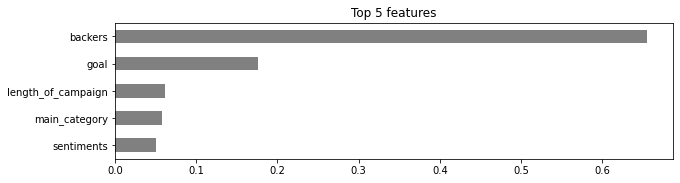

In [35]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 5
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');